In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sgd_L1 import NeuralNetwork

rng = np.random.default_rng()

with open("../data/train_data.pkl", "rb") as train_file:
    train_data = pickle.load(train_file)

rng.shuffle(train_data)
validation_data = train_data[:5000]
train_data = train_data[5000:]

### Upper bound

At $\lambda=10$ it gets so "regulirized" that stucks at a "random selector" minima

In [3]:
# Get upper bound

nn = NeuralNetwork(
    [28*28, 1024, 512, 128, 10], # layers size
    1e-3,                        # learning rate
    10e-0,                       # L1 lambda
    64,                          # mini batch size
    2                            # training epochs
)

nn.train(train_data, validation_data)

Pre-train stats
==> Accuracy: 8.5%, Avg loss: 5.972364

Epoch 0
--------------------
loss: 6.705551 [mini-batch 0 / 859]
loss: 1.418251 [mini-batch 100 / 859]
loss: 2.296339 [mini-batch 200 / 859]
loss: 2.308395 [mini-batch 300 / 859]
loss: 2.305484 [mini-batch 400 / 859]
loss: 2.304683 [mini-batch 500 / 859]
loss: 2.306601 [mini-batch 600 / 859]
loss: 2.301514 [mini-batch 700 / 859]
loss: 2.305207 [mini-batch 800 / 859]
==> Accuracy: 9.8%, Avg loss: 2.303608

Epoch 1
--------------------
loss: 2.302784 [mini-batch 0 / 859]
loss: 2.302857 [mini-batch 100 / 859]
loss: 2.294295 [mini-batch 200 / 859]
loss: 2.303978 [mini-batch 300 / 859]
loss: 2.309819 [mini-batch 400 / 859]
loss: 2.306653 [mini-batch 500 / 859]
loss: 2.302232 [mini-batch 600 / 859]
loss: 2.306193 [mini-batch 700 / 859]
loss: 2.302693 [mini-batch 800 / 859]
==> Accuracy: 9.8%, Avg loss: 2.303483



([0.0846, 0.0976, 0.0976],
 [5.972364226390625, 2.303608148055029, 2.303483041974756])

### Grid search (single sample)

In [4]:
lambdas = [0.001, 0.01, 0.1, 1, 5]

result = []
for l in lambdas:
    nn = NeuralNetwork(
        [28*28, 1024, 512, 128, 10], # layers size
        1e-3,                        # learning rate
        l,                           # L1 lambda
        64,                          # mini batch size
        20                           # training epochs
    )
    accuracy, _ = nn.train(train_data, validation_data)
    result.append( accuracy[-1] )

Pre-train stats
==> Accuracy: 11.0%, Avg loss: 4.962476

Epoch 0
--------------------
loss: 4.979127 [mini-batch 0 / 859]
loss: 0.781828 [mini-batch 100 / 859]
loss: 0.494548 [mini-batch 200 / 859]
loss: 0.562200 [mini-batch 300 / 859]
loss: 0.579491 [mini-batch 400 / 859]
loss: 0.628759 [mini-batch 500 / 859]
loss: 0.427479 [mini-batch 600 / 859]
loss: 0.528160 [mini-batch 700 / 859]
loss: 0.365394 [mini-batch 800 / 859]
==> Accuracy: 83.2%, Avg loss: 0.481751

Epoch 1
--------------------
loss: 0.299071 [mini-batch 0 / 859]
loss: 0.401725 [mini-batch 100 / 859]
loss: 0.486557 [mini-batch 200 / 859]
loss: 0.442566 [mini-batch 300 / 859]
loss: 0.489084 [mini-batch 400 / 859]
loss: 0.417864 [mini-batch 500 / 859]
loss: 0.435142 [mini-batch 600 / 859]
loss: 0.249554 [mini-batch 700 / 859]
loss: 0.481318 [mini-batch 800 / 859]
==> Accuracy: 84.8%, Avg loss: 0.443310

Epoch 2
--------------------
loss: 0.234713 [mini-batch 0 / 859]
loss: 0.463540 [mini-batch 100 / 859]
loss: 0.377183 [mini

/home/guille/Documents/fashion_mnist_nn/regularization/sgd_L1.py:70: RuntimeWarning: divide by zero encountered in log
  return - (y * np.log(self.a[-1])).sum()
/home/guille/Documents/fashion_mnist_nn/regularization/sgd_L1.py:70: RuntimeWarning: invalid value encountered in multiply
  return - (y * np.log(self.a[-1])).sum()
/home/guille/Documents/fashion_mnist_nn/regularization/sgd_L1.py:65: RuntimeWarning: overflow encountered in matmul
  self.z[l] = self.weights[l] @ self.a[l-1] + self.biases[l]
/home/guille/venv/torch/lib/python3.11/site-packages/scipy/special/_logsumexp.py:233: RuntimeWarning: invalid value encountered in subtract
  exp_x_shifted = np.exp(x - x_max)


loss:      nan [mini-batch 700 / 859]
loss:      nan [mini-batch 800 / 859]
==> Accuracy: 9.5%, Avg loss:      nan

Epoch 17
--------------------
loss:      nan [mini-batch 0 / 859]
loss:      nan [mini-batch 100 / 859]
loss:      nan [mini-batch 200 / 859]
loss:      nan [mini-batch 300 / 859]
loss:      nan [mini-batch 400 / 859]
loss:      nan [mini-batch 500 / 859]
loss:      nan [mini-batch 600 / 859]
loss:      nan [mini-batch 700 / 859]
loss:      nan [mini-batch 800 / 859]
==> Accuracy: 9.5%, Avg loss:      nan

Epoch 18
--------------------
loss:      nan [mini-batch 0 / 859]
loss:      nan [mini-batch 100 / 859]
loss:      nan [mini-batch 200 / 859]
loss:      nan [mini-batch 300 / 859]
loss:      nan [mini-batch 400 / 859]
loss:      nan [mini-batch 500 / 859]
loss:      nan [mini-batch 600 / 859]
loss:      nan [mini-batch 700 / 859]
loss:      nan [mini-batch 800 / 859]
==> Accuracy: 9.5%, Avg loss:      nan

Epoch 19
--------------------
loss:      nan [mini-batch 0 / 859

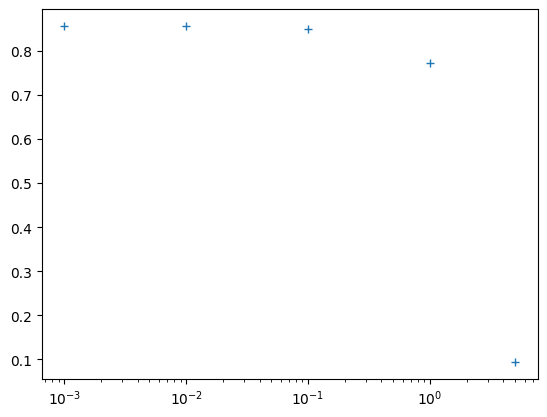

In [8]:
plt.plot(lambdas, result, "+")
plt.xscale("log")